# Read CSV file & Import

In [446]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
fastFood_NJ = pd.read_csv('fastFood_NJ.csv')

# Data infomation check

In [447]:
# information check
fastFood_NJ.info()
fastFood_NJ.head()
fastFood_NJ['name'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        1783 non-null   object 
 1   categories  1783 non-null   object 
 2   reviews     1783 non-null   int64  
 3   rating      1783 non-null   float64
 4   price       1391 non-null   object 
 5   latitude    1783 non-null   float64
 6   longitude   1783 non-null   float64
 7   address     1783 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 111.6+ KB


name
McDonald's                  257
Burger King                 186
Wendy's                     150
Jersey Mike's Subs          122
Taco Bell                   102
                           ... 
Moe's Southwest Grill         1
Wings Over Rutgers            1
Gallo Felix                   1
Campus Deli & Food Store      1
Wendy's Ramsey                1
Name: count, Length: 317, dtype: int64

# Question 1

## 1. Scatter plot for latitude and longtitude

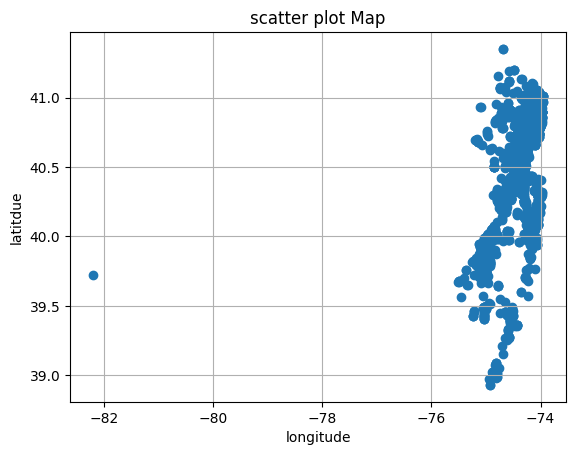

In [448]:
plt.scatter( fastFood_NJ.longitude, fastFood_NJ.latitude)
plt.xlabel("longitude")
plt.ylabel("latitdue")
plt.title("scatter plot Map")
plt.grid()
plt.show()

## 2. Boxplot for review

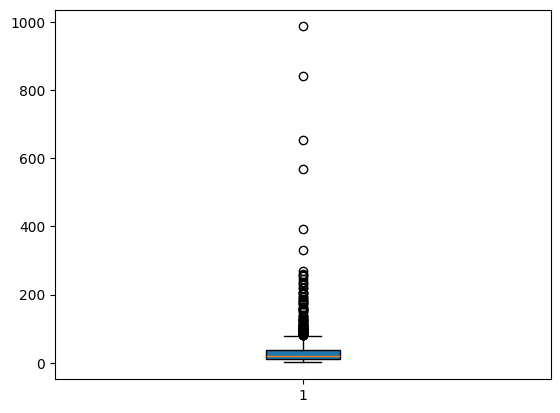

In [449]:
review = fastFood_NJ.reviews
plt.boxplot(review, patch_artist= True)
plt.show()

# Qestion 2

In [450]:
# creat a new colomn city
fastFood_NJ['city'] = fastFood_NJ["address"].str.split(",").str[1].str.strip()

In [451]:
# Data frame information check
fastFood_NJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        1783 non-null   object 
 1   categories  1783 non-null   object 
 2   reviews     1783 non-null   int64  
 3   rating      1783 non-null   float64
 4   price       1391 non-null   object 
 5   latitude    1783 non-null   float64
 6   longitude   1783 non-null   float64
 7   address     1783 non-null   object 
 8   city        1783 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 125.5+ KB


In [452]:
# Define a function for the most resturant ,return the city name
def mxnumber_resturant_city(fastfood_name):
                                                       
    fastfood_df = fastFood_NJ[fastFood_NJ["name"].str.contains(fastfood_name, case = False, na = False)]
    city_mcd_count = {}

    for _, row in fastfood_df.iterrows():
        city = row["city"]
        if city in city_mcd_count:
            city_mcd_count[city] +=1
        else:
            city_mcd_count[city] = 1

    max_value = max(city_mcd_count.values())
    max_city = {key: value for key, value in city_mcd_count.items() if value == max_value}
    
    max_city_str = ", ".join(max_city)
    print(f"The City {max_city_str} has the most {fastfood_name} with {max_value} stores.")

    return 

#### Which city name has the most McDonald's?  Which city has the most Burger King? Which city has the most Subway? Which city has the most Wendy's?

In [453]:
mxnumber_resturant_city("McDonald's")
mxnumber_resturant_city("Burger King")
mxnumber_resturant_city("Subway")
mxnumber_resturant_city("Wendy's")

The City Newark, Jersey City has the most McDonald's with 9 stores.
The City Trenton has the most Burger King with 5 stores.
The City Hamilton has the most Subway with 3 stores.
The City Newark, Paramus has the most Wendy's with 5 stores.


### Define  function to get highest rating

In [454]:
# if only get the highest rating, not mean
def  highest_rate_2(fastfood_name, col= "name"):
    if col not in fastFood_NJ.columns:
       print(f"Column '{col}' not found in CSV. Available columns: {list(fastFood_NJ.columns)}")
       return {}
    
    fastfood_df = fastFood_NJ[fastFood_NJ[col].str.contains(fastfood_name, case = False, na = False)]

    retrun_dt= {}
    rate = 0

    for _, row in fastfood_df.iterrows():
        name = row["name"]

        if rate > row["rating"]:
            continue
        elif rate < row["rating"]:
            rate = row["rating"]
            if col == "name":
                retrun_dt[name] = rate
            elif col =="categories":
                retrun_dt.clear()
        
        retrun_dt[name] = rate
        
    return retrun_dt

In [ ]:
# restaurant has multiple stores and get the mean rating
def  highest_rate(fastfood_name, col= "name"):
    if col not in fastFood_NJ.columns:
       print(f"Column '{col}' not found in CSV. Available columns: {list(fastFood_NJ.columns)}")
       return {}
    
    fastfood_df = fastFood_NJ[fastFood_NJ[col].str.contains(fastfood_name, case = False, na = False)]

    # return_dt = defaultdict(lambda: {"rate": 0, "count": 0})

    # for _, row in fastfood_df.iterrows():
    #     name = row["name"]
    #     return_dt[name]["rate"] += row["rating"]
    #     return_dt[name]["count"] += 1
    return_dt= {}

    rate = 0
    
    for _, row in fastfood_df.iterrows():
        name = row["name"]
        rate = row["rating"]

        if name in return_dt:
            return_dt[name]["rate"] += rate
            return_dt[name]["count"] += 1
        else:
            return_dt[name] = {"rate":rate, "count" : 1}
        
    if col == "name":
        rate = sum(value["rate"] for value in return_dt.values())
        con = sum(value["count"] for value in return_dt.values())
        # return {fastfood_name: round(total_rate / total_count, 2)}
        return_dt.clear()
        return_dt[fastfood_name] = round(rate/ con, 2)
    else:
        # return {name: round(v["rate"] / v["count"], 2) for name, v in return_dt.items()}
        for name in return_dt:
            return_dt[name] = round(return_dt[name]["rate"] / return_dt[name]["count"], 2)

    return return_dt

In [456]:
# Define a function to find the max value 
def maxvalue_df(rating_dic):
    max_rate = {key: value for key, value in rating_dic.items() if value == max(rating_dic.values())}   
    max_rate_str = ", ".join(max_rate)
    print(f"{max_rate_str} have the highest rate with {round(max(rating_dic.values()),2)}.")
    return

In [457]:
# Define a function to find the max value 
def minvalue_df(rating_dic):
    max_rate = {key: value for key, value in rating_dic.items() if value == min(rating_dic.values())}   
    max_rate_str = ", ".join(max_rate)
    print(f"{max_rate_str} have the lowest rate with {round(min(rating_dic.values()),2)}.")
    return

# Question 3

## The ratings of McDonald's, Burger King, Subway, Wendy's, KFC, and Pizza Hut. 
### Which one has the highest or lowest rating?

In [458]:
highest_rating = {}
highest_rating.update(highest_rate("Burger King"))
highest_rating.update(highest_rate("McDonald's"))
highest_rating.update(highest_rate("Subway"))
highest_rating.update(highest_rate("KFC"))
highest_rating.update(highest_rate("Pizza Hut"))
highest_rating.update(highest_rate("Wendy's"))
maxvalue_df(highest_rating)
minvalue_df(highest_rating)

Subway have the highest rate with 2.26.
Pizza Hut have the lowest rate with 1.86.


# Qestion 4

## Which Sandwiches (Category) restaurant has the highest rating

In [459]:
maxrate_sandwichesstore = highest_rate("Sandwiches", "categories")
maxvalue_df(maxrate_sandwichesstore)

Margarita's Deli, Zalim Foods, Ala kayfak have the highest rate with 5.0.


# Question 5

## boxplot of reviews for each rating

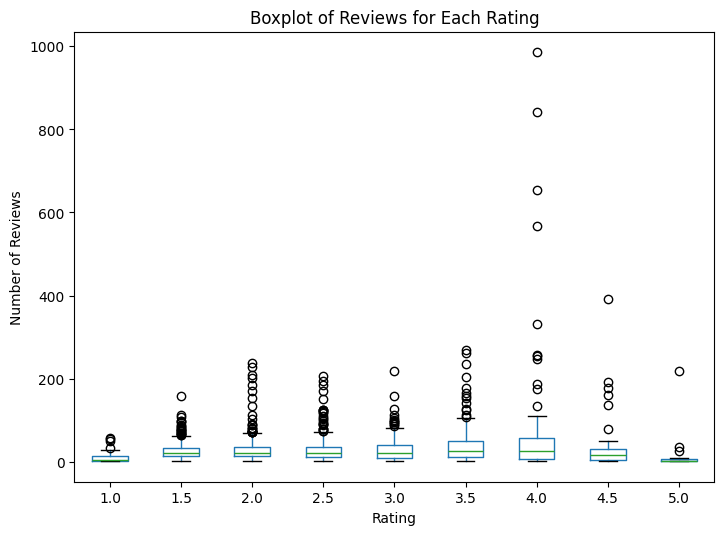

In [460]:
# Create a boxplot of 'reviews' grouped by 'rating'
fastFood_NJ.boxplot(column="reviews", by="rating", grid=False, figsize=(8,6))

# Improve the plot title
plt.title("Boxplot of Reviews for Each Rating")
plt.suptitle("")  # Remove automatic subplot title
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")

# Show the plot
plt.show()

# Question 6

## Get a data frame for the McDlonald's in Middlesex county, and write it as a CSV file.

In [461]:
# read the citycounty csv file
citycountry_NJ = pd.read_csv("citycounty.csv")
citycountry_NJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   City    569 non-null    object
 1   County  569 non-null    object
dtypes: object(2)
memory usage: 9.0+ KB


In [462]:
# Get city name in Middlesex 
middlesex_df = citycountry_NJ[citycountry_NJ["County"].str.contains("Middlesex", case = False, na = False)]

In [463]:
# Get all maDlonald strore
mcDlonald_store= fastFood_NJ[fastFood_NJ["name"].str.contains("McDonald's", case=False, na=False)]

In [464]:
# Define a dataframe to store the information
mcDonald_Middlesex = []
middlesex_cities = set(middlesex_df["City"])

for _, row in mcDlonald_store.iterrows():
    if row["city"] in middlesex_cities:
        mcDonald_Middlesex.append(row)

mcDonald_Middlesex_df = pd.DataFrame(mcDonald_Middlesex)

mcDonald_Middlesex_df.to_csv("Mcdonalds_Middlesex.csv")

print("The infomation of McDonald's in Middlesex county has been written as a CSV file.")

The infomation of McDonald's in Middlesex county has been written as a CSV file.
